In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.models import load_model
import keras.layers
import keras.optimizers
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import csv
import random

In [2]:
#Data preparation

In [7]:
Data = []
with open('../data_dim.csv') as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader: # each row is a list
        Data.append(row)

for row in Data[1:]:
    row.pop(0)
    row[::2] = [x / 105 for x in [float(i) for i in row[::2]]]
    row[1::2] = [x / 68 for x in [float(i) for i in row[1::2]]]
    


x = []
y = []

for i in range(1, len(Data)-2):
    x.append([Data[i]])
    y.append([Data[i+1]])
    
Data = x
target = y

In [8]:
data = np.array(Data, dtype=float)
target = np.array(target, dtype=float)

In [9]:
data.shape

(22140, 1, 46)

In [10]:
target.shape

(22140, 1, 46)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(data, target, test_size=0.2, random_state=4)

In [284]:
#RNN

In [313]:
model = Sequential()

In [314]:
model.add(Bidirectional(LSTM((23), batch_input_shape=(None, 1, 46), return_sequences=True, activation='tanh'),
                    merge_mode='concat', weights=None))
model.add(TimeDistributed(Dense(46), input_shape=(1, 46)))
model.add(Bidirectional(LSTM((23), batch_input_shape=(None, 1, 46), return_sequences=True, activation='tanh'),
                    merge_mode='concat', weights=None))
model.add(TimeDistributed(Dense(46), input_shape=(1, 46)))
model.add(Bidirectional(LSTM((23), batch_input_shape=(None, 1, 46), return_sequences=True, activation='tanh'),
                    merge_mode='concat', weights=None))
model.add(TimeDistributed(Dense(46), input_shape=(1, 46)))
model.add(Bidirectional(LSTM((23), batch_input_shape=(None, 1, 46), return_sequences=True, activation='tanh'),
                    merge_mode='concat', weights=None))
model.add(Dense(46))

In [315]:
adam = keras.optimizers.adam(lr = 0.0001)

In [316]:
model.compile(loss='mean_absolute_error', optimizer=adam, metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_46 (Bidirectio (None, 1, 46)             12880     
_________________________________________________________________
time_distributed_26 (TimeDis (None, 1, 46)             2162      
_________________________________________________________________
bidirectional_47 (Bidirectio (None, 1, 46)             12880     
_________________________________________________________________
time_distributed_27 (TimeDis (None, 1, 46)             2162      
_________________________________________________________________
bidirectional_48 (Bidirectio (None, 1, 46)             12880     
_________________________________________________________________
time_distributed_28 (TimeDis (None, 1, 46)             2162      
_________________________________________________________________
bidirectional_49 (Bidirectio (None, 1, 46)             12880     
__________

In [318]:
history = model.fit(x_train, y_train, epochs=3000, validation_data=(x_test, y_test))

Train on 17712 samples, validate on 4428 samples
Epoch 1/3000
17712/17712 [==============================] - 16s 892us/step - loss: 0.1928 - acc: 0.3626 - val_loss: 0.0918 - val_acc: 0.4128
Epoch 2/3000
17712/17712 [==============================] - 5s 261us/step - loss: 0.0896 - acc: 0.4073 - val_loss: 0.0848 - val_acc: 0.4128
Epoch 3/3000
17712/17712 [==============================] - 5s 263us/step - loss: 0.0784 - acc: 0.4089 - val_loss: 0.0688 - val_acc: 0.4289
Epoch 4/3000
17712/17712 [==============================] - 5s 266us/step - loss: 0.0609 - acc: 0.4639 - val_loss: 0.0575 - val_acc: 0.4684
Epoch 5/3000
17712/17712 [==============================] - 5s 266us/step - loss: 0.0566 - acc: 0.4540 - val_loss: 0.0561 - val_acc: 0.4774
Epoch 6/3000
17712/17712 [==============================] - 5s 278us/step - loss: 0.0555 - acc: 0.4635 - val_loss: 0.0554 - val_acc: 0.4575
Epoch 7/3000
17712/17712 [==============================] - 5s 263us/step - loss: 0.0550 - acc: 0.4657 - val_l

Epoch 59/3000
17712/17712 [==============================] - 5s 272us/step - loss: 0.0313 - acc: 0.7289 - val_loss: 0.0313 - val_acc: 0.7448
Epoch 60/3000
17712/17712 [==============================] - 5s 265us/step - loss: 0.0312 - acc: 0.7298 - val_loss: 0.0312 - val_acc: 0.7430
Epoch 61/3000
17712/17712 [==============================] - 5s 266us/step - loss: 0.0310 - acc: 0.7295 - val_loss: 0.0311 - val_acc: 0.7446
Epoch 62/3000
17712/17712 [==============================] - 5s 263us/step - loss: 0.0309 - acc: 0.7308 - val_loss: 0.0310 - val_acc: 0.7477
Epoch 63/3000
17712/17712 [==============================] - 5s 264us/step - loss: 0.0308 - acc: 0.7292 - val_loss: 0.0308 - val_acc: 0.7412
Epoch 64/3000
17712/17712 [==============================] - 5s 264us/step - loss: 0.0306 - acc: 0.7312 - val_loss: 0.0306 - val_acc: 0.7421
Epoch 65/3000
17712/17712 [==============================] - 5s 269us/step - loss: 0.0305 - acc: 0.7315 - val_loss: 0.0306 - val_acc: 0.7450
Epoch 66/3000

Epoch 117/3000
17712/17712 [==============================] - 5s 263us/step - loss: 0.0264 - acc: 0.7512 - val_loss: 0.0266 - val_acc: 0.7554
Epoch 118/3000
17712/17712 [==============================] - 5s 261us/step - loss: 0.0264 - acc: 0.7485 - val_loss: 0.0266 - val_acc: 0.7579
Epoch 119/3000
17712/17712 [==============================] - 5s 263us/step - loss: 0.0263 - acc: 0.7519 - val_loss: 0.0264 - val_acc: 0.7577
Epoch 120/3000
17712/17712 [==============================] - 5s 264us/step - loss: 0.0263 - acc: 0.7512 - val_loss: 0.0264 - val_acc: 0.7577
Epoch 121/3000
17712/17712 [==============================] - 5s 264us/step - loss: 0.0262 - acc: 0.7518 - val_loss: 0.0263 - val_acc: 0.7556
Epoch 122/3000
17712/17712 [==============================] - 5s 263us/step - loss: 0.0262 - acc: 0.7521 - val_loss: 0.0263 - val_acc: 0.7588
Epoch 123/3000
17712/17712 [==============================] - 5s 266us/step - loss: 0.0261 - acc: 0.7549 - val_loss: 0.0262 - val_acc: 0.7554
Epoch 

Epoch 175/3000
17712/17712 [==============================] - 5s 270us/step - loss: 0.0228 - acc: 0.8146 - val_loss: 0.0232 - val_acc: 0.8202
Epoch 176/3000
17712/17712 [==============================] - 5s 262us/step - loss: 0.0227 - acc: 0.8167 - val_loss: 0.0229 - val_acc: 0.8193
Epoch 177/3000
17712/17712 [==============================] - 5s 262us/step - loss: 0.0227 - acc: 0.8180 - val_loss: 0.0228 - val_acc: 0.8229
Epoch 178/3000
17712/17712 [==============================] - 5s 263us/step - loss: 0.0226 - acc: 0.8189 - val_loss: 0.0228 - val_acc: 0.8193
Epoch 179/3000
17712/17712 [==============================] - 5s 267us/step - loss: 0.0226 - acc: 0.8213 - val_loss: 0.0227 - val_acc: 0.8225
Epoch 180/3000
17712/17712 [==============================] - 5s 262us/step - loss: 0.0226 - acc: 0.8199 - val_loss: 0.0228 - val_acc: 0.8234
Epoch 181/3000
17712/17712 [==============================] - 5s 265us/step - loss: 0.0225 - acc: 0.8213 - val_loss: 0.0227 - val_acc: 0.8270
Epoch 

Epoch 233/3000
17712/17712 [==============================] - 5s 262us/step - loss: 0.0204 - acc: 0.8398 - val_loss: 0.0206 - val_acc: 0.8480
Epoch 234/3000
17712/17712 [==============================] - 5s 264us/step - loss: 0.0204 - acc: 0.8398 - val_loss: 0.0204 - val_acc: 0.8519
Epoch 235/3000
17712/17712 [==============================] - 5s 263us/step - loss: 0.0203 - acc: 0.8407 - val_loss: 0.0205 - val_acc: 0.8507
Epoch 236/3000
17712/17712 [==============================] - 5s 264us/step - loss: 0.0203 - acc: 0.8412 - val_loss: 0.0204 - val_acc: 0.8528
Epoch 237/3000
17712/17712 [==============================] - 5s 264us/step - loss: 0.0203 - acc: 0.8400 - val_loss: 0.0204 - val_acc: 0.8487
Epoch 238/3000
17712/17712 [==============================] - 5s 270us/step - loss: 0.0202 - acc: 0.8416 - val_loss: 0.0203 - val_acc: 0.8530
Epoch 239/3000
17712/17712 [==============================] - 5s 263us/step - loss: 0.0202 - acc: 0.8416 - val_loss: 0.0204 - val_acc: 0.8512
Epoch 

Epoch 291/3000
17712/17712 [==============================] - 5s 304us/step - loss: 0.0188 - acc: 0.8620 - val_loss: 0.0190 - val_acc: 0.8776
Epoch 292/3000
17712/17712 [==============================] - 5s 302us/step - loss: 0.0188 - acc: 0.8625 - val_loss: 0.0188 - val_acc: 0.8753
Epoch 293/3000
17712/17712 [==============================] - 5s 303us/step - loss: 0.0187 - acc: 0.8617 - val_loss: 0.0188 - val_acc: 0.8765
Epoch 294/3000
17712/17712 [==============================] - 5s 303us/step - loss: 0.0187 - acc: 0.8624 - val_loss: 0.0188 - val_acc: 0.8765
Epoch 295/3000
17712/17712 [==============================] - 5s 302us/step - loss: 0.0187 - acc: 0.8629 - val_loss: 0.0188 - val_acc: 0.8744
Epoch 296/3000
17712/17712 [==============================] - 5s 303us/step - loss: 0.0187 - acc: 0.8629 - val_loss: 0.0187 - val_acc: 0.8774
Epoch 297/3000
17712/17712 [==============================] - 5s 303us/step - loss: 0.0187 - acc: 0.8640 - val_loss: 0.0187 - val_acc: 0.8688
Epoch 

Epoch 349/3000
17712/17712 [==============================] - 8s 439us/step - loss: 0.0176 - acc: 0.8674 - val_loss: 0.0178 - val_acc: 0.8722
Epoch 350/3000
17712/17712 [==============================] - 8s 427us/step - loss: 0.0176 - acc: 0.8663 - val_loss: 0.0177 - val_acc: 0.8787
Epoch 351/3000
17712/17712 [==============================] - 8s 428us/step - loss: 0.0176 - acc: 0.8682 - val_loss: 0.0176 - val_acc: 0.8785
Epoch 352/3000
17712/17712 [==============================] - 8s 436us/step - loss: 0.0175 - acc: 0.8674 - val_loss: 0.0177 - val_acc: 0.8785
Epoch 353/3000
17712/17712 [==============================] - 8s 433us/step - loss: 0.0175 - acc: 0.8694 - val_loss: 0.0176 - val_acc: 0.8780
Epoch 354/3000
17712/17712 [==============================] - 8s 437us/step - loss: 0.0175 - acc: 0.8677 - val_loss: 0.0176 - val_acc: 0.8780
Epoch 355/3000
17712/17712 [==============================] - 8s 438us/step - loss: 0.0175 - acc: 0.8651 - val_loss: 0.0176 - val_acc: 0.8790
Epoch 

Epoch 407/3000
17712/17712 [==============================] - 8s 436us/step - loss: 0.0165 - acc: 0.8720 - val_loss: 0.0166 - val_acc: 0.8796
Epoch 408/3000
17712/17712 [==============================] - 8s 443us/step - loss: 0.0165 - acc: 0.8722 - val_loss: 0.0166 - val_acc: 0.8812
Epoch 409/3000
17712/17712 [==============================] - 8s 426us/step - loss: 0.0165 - acc: 0.8707 - val_loss: 0.0166 - val_acc: 0.8796
Epoch 410/3000
17712/17712 [==============================] - 7s 421us/step - loss: 0.0165 - acc: 0.8711 - val_loss: 0.0166 - val_acc: 0.8794
Epoch 411/3000
17712/17712 [==============================] - 8s 429us/step - loss: 0.0165 - acc: 0.8733 - val_loss: 0.0166 - val_acc: 0.8760
Epoch 412/3000
17712/17712 [==============================] - 8s 432us/step - loss: 0.0165 - acc: 0.8727 - val_loss: 0.0166 - val_acc: 0.8799
Epoch 413/3000
17712/17712 [==============================] - 8s 433us/step - loss: 0.0165 - acc: 0.8713 - val_loss: 0.0165 - val_acc: 0.8776
Epoch 

Epoch 465/3000
17712/17712 [==============================] - 8s 433us/step - loss: 0.0156 - acc: 0.8805 - val_loss: 0.0158 - val_acc: 0.8823
Epoch 466/3000
17712/17712 [==============================] - 8s 434us/step - loss: 0.0156 - acc: 0.8827 - val_loss: 0.0158 - val_acc: 0.8862
Epoch 467/3000
17712/17712 [==============================] - 8s 424us/step - loss: 0.0156 - acc: 0.8823 - val_loss: 0.0157 - val_acc: 0.8889
Epoch 468/3000
17712/17712 [==============================] - 8s 433us/step - loss: 0.0156 - acc: 0.8824 - val_loss: 0.0156 - val_acc: 0.8862
Epoch 469/3000
17712/17712 [==============================] - 8s 434us/step - loss: 0.0156 - acc: 0.8806 - val_loss: 0.0156 - val_acc: 0.8902
Epoch 470/3000
17712/17712 [==============================] - 8s 434us/step - loss: 0.0156 - acc: 0.8823 - val_loss: 0.0157 - val_acc: 0.8848
Epoch 471/3000
17712/17712 [==============================] - 8s 436us/step - loss: 0.0156 - acc: 0.8829 - val_loss: 0.0157 - val_acc: 0.8911
Epoch 

Epoch 523/3000
17712/17712 [==============================] - 8s 437us/step - loss: 0.0150 - acc: 0.8873 - val_loss: 0.0151 - val_acc: 0.8905
Epoch 524/3000
17712/17712 [==============================] - 8s 437us/step - loss: 0.0150 - acc: 0.8870 - val_loss: 0.0152 - val_acc: 0.8907
Epoch 525/3000
17712/17712 [==============================] - 8s 440us/step - loss: 0.0150 - acc: 0.8875 - val_loss: 0.0151 - val_acc: 0.8961
Epoch 526/3000
17712/17712 [==============================] - 8s 433us/step - loss: 0.0150 - acc: 0.8872 - val_loss: 0.0153 - val_acc: 0.8927
Epoch 527/3000
17712/17712 [==============================] - 8s 443us/step - loss: 0.0150 - acc: 0.8859 - val_loss: 0.0151 - val_acc: 0.8898
Epoch 528/3000
17712/17712 [==============================] - 8s 449us/step - loss: 0.0149 - acc: 0.8863 - val_loss: 0.0152 - val_acc: 0.8898
Epoch 529/3000
17712/17712 [==============================] - 8s 447us/step - loss: 0.0149 - acc: 0.8875 - val_loss: 0.0150 - val_acc: 0.8945
Epoch 

Epoch 581/3000
17712/17712 [==============================] - 8s 431us/step - loss: 0.0145 - acc: 0.8910 - val_loss: 0.0146 - val_acc: 0.8968
Epoch 582/3000
17712/17712 [==============================] - 8s 432us/step - loss: 0.0145 - acc: 0.8889 - val_loss: 0.0147 - val_acc: 0.8966
Epoch 583/3000
17712/17712 [==============================] - 8s 433us/step - loss: 0.0145 - acc: 0.8900 - val_loss: 0.0148 - val_acc: 0.8961
Epoch 584/3000
17712/17712 [==============================] - 8s 432us/step - loss: 0.0145 - acc: 0.8893 - val_loss: 0.0146 - val_acc: 0.8945
Epoch 585/3000
17712/17712 [==============================] - 8s 426us/step - loss: 0.0145 - acc: 0.8902 - val_loss: 0.0146 - val_acc: 0.8945
Epoch 586/3000
17712/17712 [==============================] - 8s 433us/step - loss: 0.0145 - acc: 0.8895 - val_loss: 0.0146 - val_acc: 0.8993
Epoch 587/3000
17712/17712 [==============================] - 8s 433us/step - loss: 0.0145 - acc: 0.8898 - val_loss: 0.0145 - val_acc: 0.8981
Epoch 

Epoch 639/3000
17712/17712 [==============================] - 8s 428us/step - loss: 0.0140 - acc: 0.8918 - val_loss: 0.0141 - val_acc: 0.9009
Epoch 640/3000
17712/17712 [==============================] - 8s 430us/step - loss: 0.0140 - acc: 0.8916 - val_loss: 0.0141 - val_acc: 0.8948
Epoch 641/3000
17712/17712 [==============================] - 8s 446us/step - loss: 0.0139 - acc: 0.8920 - val_loss: 0.0140 - val_acc: 0.9022
Epoch 642/3000
17712/17712 [==============================] - 8s 436us/step - loss: 0.0139 - acc: 0.8893 - val_loss: 0.0142 - val_acc: 0.8975
Epoch 643/3000
17712/17712 [==============================] - 8s 438us/step - loss: 0.0139 - acc: 0.8918 - val_loss: 0.0140 - val_acc: 0.8988
Epoch 644/3000
17712/17712 [==============================] - 8s 435us/step - loss: 0.0139 - acc: 0.8901 - val_loss: 0.0140 - val_acc: 0.8984
Epoch 645/3000
17712/17712 [==============================] - 8s 434us/step - loss: 0.0139 - acc: 0.8910 - val_loss: 0.0141 - val_acc: 0.8981
Epoch 

Epoch 697/3000
17712/17712 [==============================] - 8s 441us/step - loss: 0.0134 - acc: 0.8936 - val_loss: 0.0136 - val_acc: 0.9006
Epoch 698/3000
17712/17712 [==============================] - 8s 437us/step - loss: 0.0134 - acc: 0.8915 - val_loss: 0.0136 - val_acc: 0.8918
Epoch 699/3000
17712/17712 [==============================] - 8s 428us/step - loss: 0.0134 - acc: 0.8936 - val_loss: 0.0135 - val_acc: 0.8941
Epoch 700/3000
17712/17712 [==============================] - 8s 441us/step - loss: 0.0134 - acc: 0.8930 - val_loss: 0.0136 - val_acc: 0.8943
Epoch 701/3000
17712/17712 [==============================] - 8s 437us/step - loss: 0.0134 - acc: 0.8933 - val_loss: 0.0136 - val_acc: 0.8984
Epoch 702/3000
17712/17712 [==============================] - 8s 436us/step - loss: 0.0134 - acc: 0.8921 - val_loss: 0.0136 - val_acc: 0.8952
Epoch 703/3000
17712/17712 [==============================] - 8s 438us/step - loss: 0.0134 - acc: 0.8939 - val_loss: 0.0135 - val_acc: 0.8977
Epoch 

Epoch 755/3000
17712/17712 [==============================] - 8s 440us/step - loss: 0.0130 - acc: 0.8954 - val_loss: 0.0131 - val_acc: 0.8979
Epoch 756/3000
17712/17712 [==============================] - 8s 438us/step - loss: 0.0129 - acc: 0.8957 - val_loss: 0.0131 - val_acc: 0.8997
Epoch 757/3000
17712/17712 [==============================] - 8s 431us/step - loss: 0.0129 - acc: 0.8970 - val_loss: 0.0130 - val_acc: 0.8984
Epoch 758/3000
17712/17712 [==============================] - 8s 440us/step - loss: 0.0129 - acc: 0.8954 - val_loss: 0.0131 - val_acc: 0.8981
Epoch 759/3000
17712/17712 [==============================] - 8s 445us/step - loss: 0.0129 - acc: 0.8967 - val_loss: 0.0130 - val_acc: 0.9027
Epoch 760/3000
17712/17712 [==============================] - 8s 434us/step - loss: 0.0129 - acc: 0.8957 - val_loss: 0.0130 - val_acc: 0.9000
Epoch 761/3000
17712/17712 [==============================] - 8s 441us/step - loss: 0.0129 - acc: 0.8970 - val_loss: 0.0132 - val_acc: 0.8968
Epoch 

Epoch 813/3000
17712/17712 [==============================] - 7s 423us/step - loss: 0.0125 - acc: 0.8989 - val_loss: 0.0127 - val_acc: 0.9020
Epoch 814/3000
17712/17712 [==============================] - 8s 443us/step - loss: 0.0125 - acc: 0.8997 - val_loss: 0.0127 - val_acc: 0.9006
Epoch 815/3000
17712/17712 [==============================] - 8s 438us/step - loss: 0.0125 - acc: 0.9004 - val_loss: 0.0127 - val_acc: 0.8979
Epoch 816/3000
17712/17712 [==============================] - 8s 429us/step - loss: 0.0125 - acc: 0.9003 - val_loss: 0.0125 - val_acc: 0.9033
Epoch 817/3000
17712/17712 [==============================] - 8s 433us/step - loss: 0.0125 - acc: 0.9000 - val_loss: 0.0126 - val_acc: 0.8988
Epoch 818/3000
17712/17712 [==============================] - 8s 434us/step - loss: 0.0125 - acc: 0.9005 - val_loss: 0.0128 - val_acc: 0.9015
Epoch 819/3000
17712/17712 [==============================] - 8s 442us/step - loss: 0.0125 - acc: 0.8996 - val_loss: 0.0126 - val_acc: 0.8986
Epoch 

Epoch 871/3000
17712/17712 [==============================] - 6s 349us/step - loss: 0.0121 - acc: 0.9015 - val_loss: 0.0124 - val_acc: 0.9070
Epoch 872/3000
17712/17712 [==============================] - 6s 346us/step - loss: 0.0121 - acc: 0.9015 - val_loss: 0.0122 - val_acc: 0.9036
Epoch 873/3000
17712/17712 [==============================] - 6s 350us/step - loss: 0.0121 - acc: 0.9041 - val_loss: 0.0122 - val_acc: 0.9029
Epoch 874/3000
17712/17712 [==============================] - 6s 348us/step - loss: 0.0121 - acc: 0.9020 - val_loss: 0.0123 - val_acc: 0.9072
Epoch 875/3000
17712/17712 [==============================] - 6s 353us/step - loss: 0.0121 - acc: 0.9029 - val_loss: 0.0122 - val_acc: 0.9042
Epoch 876/3000
17712/17712 [==============================] - 6s 352us/step - loss: 0.0121 - acc: 0.9025 - val_loss: 0.0122 - val_acc: 0.9058
Epoch 877/3000
17712/17712 [==============================] - 6s 347us/step - loss: 0.0121 - acc: 0.9026 - val_loss: 0.0123 - val_acc: 0.9031
Epoch 

Epoch 929/3000
17712/17712 [==============================] - 6s 352us/step - loss: 0.0118 - acc: 0.9033 - val_loss: 0.0120 - val_acc: 0.9018
Epoch 930/3000
17712/17712 [==============================] - 6s 346us/step - loss: 0.0118 - acc: 0.9042 - val_loss: 0.0119 - val_acc: 0.9045
Epoch 931/3000
17712/17712 [==============================] - 6s 348us/step - loss: 0.0118 - acc: 0.9058 - val_loss: 0.0120 - val_acc: 0.9083
Epoch 932/3000
17712/17712 [==============================] - 6s 350us/step - loss: 0.0118 - acc: 0.9053 - val_loss: 0.0119 - val_acc: 0.9070
Epoch 933/3000
17712/17712 [==============================] - 6s 347us/step - loss: 0.0118 - acc: 0.9054 - val_loss: 0.0120 - val_acc: 0.9056
Epoch 934/3000
17712/17712 [==============================] - 6s 346us/step - loss: 0.0118 - acc: 0.9055 - val_loss: 0.0119 - val_acc: 0.9047
Epoch 935/3000
17712/17712 [==============================] - 6s 347us/step - loss: 0.0118 - acc: 0.9037 - val_loss: 0.0119 - val_acc: 0.9061
Epoch 

Epoch 987/3000
17712/17712 [==============================] - 6s 353us/step - loss: 0.0116 - acc: 0.9078 - val_loss: 0.0118 - val_acc: 0.9058
Epoch 988/3000
17712/17712 [==============================] - 6s 349us/step - loss: 0.0116 - acc: 0.9083 - val_loss: 0.0117 - val_acc: 0.9036
Epoch 989/3000
17712/17712 [==============================] - 6s 349us/step - loss: 0.0116 - acc: 0.9075 - val_loss: 0.0118 - val_acc: 0.9065
Epoch 990/3000
17712/17712 [==============================] - 6s 350us/step - loss: 0.0116 - acc: 0.9091 - val_loss: 0.0118 - val_acc: 0.9058
Epoch 991/3000
17712/17712 [==============================] - 6s 350us/step - loss: 0.0116 - acc: 0.9081 - val_loss: 0.0117 - val_acc: 0.9072
Epoch 992/3000
17712/17712 [==============================] - 6s 350us/step - loss: 0.0116 - acc: 0.9090 - val_loss: 0.0117 - val_acc: 0.9042
Epoch 993/3000
17712/17712 [==============================] - 6s 348us/step - loss: 0.0116 - acc: 0.9083 - val_loss: 0.0116 - val_acc: 0.9076
Epoch 

17712/17712 [==============================] - 6s 349us/step - loss: 0.0111 - acc: 0.9170 - val_loss: 0.0112 - val_acc: 0.9126
Epoch 1102/3000
17712/17712 [==============================] - 6s 354us/step - loss: 0.0111 - acc: 0.9173 - val_loss: 0.0111 - val_acc: 0.9133
Epoch 1103/3000
17712/17712 [==============================] - 7s 391us/step - loss: 0.0110 - acc: 0.9185 - val_loss: 0.0112 - val_acc: 0.9155
Epoch 1104/3000
17712/17712 [==============================] - 6s 346us/step - loss: 0.0110 - acc: 0.9166 - val_loss: 0.0113 - val_acc: 0.9176
Epoch 1105/3000
17712/17712 [==============================] - 7s 371us/step - loss: 0.0110 - acc: 0.9177 - val_loss: 0.0113 - val_acc: 0.9128
Epoch 1106/3000
17712/17712 [==============================] - 7s 422us/step - loss: 0.0110 - acc: 0.9169 - val_loss: 0.0112 - val_acc: 0.9149
Epoch 1107/3000
17712/17712 [==============================] - 7s 397us/step - loss: 0.0110 - acc: 0.9163 - val_loss: 0.0112 - val_acc: 0.9169
Epoch 1108/3000

17712/17712 [==============================] - 7s 394us/step - loss: 0.0106 - acc: 0.9227 - val_loss: 0.0109 - val_acc: 0.9187
Epoch 1216/3000
17712/17712 [==============================] - 7s 395us/step - loss: 0.0107 - acc: 0.9223 - val_loss: 0.0108 - val_acc: 0.9234
Epoch 1217/3000
17712/17712 [==============================] - 7s 397us/step - loss: 0.0106 - acc: 0.9236 - val_loss: 0.0107 - val_acc: 0.9232
Epoch 1218/3000
17712/17712 [==============================] - 7s 394us/step - loss: 0.0106 - acc: 0.9239 - val_loss: 0.0109 - val_acc: 0.9214
Epoch 1219/3000
17712/17712 [==============================] - 7s 392us/step - loss: 0.0106 - acc: 0.9246 - val_loss: 0.0108 - val_acc: 0.9212
Epoch 1220/3000
17712/17712 [==============================] - 7s 394us/step - loss: 0.0106 - acc: 0.9239 - val_loss: 0.0108 - val_acc: 0.9221
Epoch 1221/3000
17712/17712 [==============================] - 7s 390us/step - loss: 0.0106 - acc: 0.9238 - val_loss: 0.0108 - val_acc: 0.9187
Epoch 1222/3000

17712/17712 [==============================] - 5s 267us/step - loss: 0.0102 - acc: 0.9256 - val_loss: 0.0103 - val_acc: 0.9257
Epoch 1330/3000
17712/17712 [==============================] - 5s 268us/step - loss: 0.0102 - acc: 0.9251 - val_loss: 0.0104 - val_acc: 0.9259
Epoch 1331/3000
17712/17712 [==============================] - 5s 259us/step - loss: 0.0102 - acc: 0.9254 - val_loss: 0.0104 - val_acc: 0.9255
Epoch 1332/3000
17712/17712 [==============================] - 5s 266us/step - loss: 0.0102 - acc: 0.9253 - val_loss: 0.0103 - val_acc: 0.9237
Epoch 1333/3000
17712/17712 [==============================] - 5s 267us/step - loss: 0.0102 - acc: 0.9265 - val_loss: 0.0102 - val_acc: 0.9268
Epoch 1334/3000
17712/17712 [==============================] - 5s 263us/step - loss: 0.0102 - acc: 0.9268 - val_loss: 0.0102 - val_acc: 0.9259
Epoch 1335/3000
17712/17712 [==============================] - 5s 290us/step - loss: 0.0102 - acc: 0.9252 - val_loss: 0.0103 - val_acc: 0.9248
Epoch 1336/3000

17712/17712 [==============================] - 8s 426us/step - loss: 0.0097 - acc: 0.9268 - val_loss: 0.0099 - val_acc: 0.9255
Epoch 1444/3000
17712/17712 [==============================] - 8s 424us/step - loss: 0.0098 - acc: 0.9262 - val_loss: 0.0100 - val_acc: 0.9277
Epoch 1445/3000
17712/17712 [==============================] - 7s 415us/step - loss: 0.0097 - acc: 0.9265 - val_loss: 0.0099 - val_acc: 0.9275
Epoch 1446/3000
17712/17712 [==============================] - 7s 416us/step - loss: 0.0097 - acc: 0.9269 - val_loss: 0.0100 - val_acc: 0.9207
Epoch 1447/3000
17712/17712 [==============================] - 7s 414us/step - loss: 0.0097 - acc: 0.9268 - val_loss: 0.0097 - val_acc: 0.9257
Epoch 1448/3000
17712/17712 [==============================] - 8s 424us/step - loss: 0.0097 - acc: 0.9269 - val_loss: 0.0098 - val_acc: 0.9248
Epoch 1449/3000
17712/17712 [==============================] - 8s 423us/step - loss: 0.0097 - acc: 0.9265 - val_loss: 0.0098 - val_acc: 0.9255
Epoch 1450/3000

17712/17712 [==============================] - 7s 421us/step - loss: 0.0093 - acc: 0.9286 - val_loss: 0.0093 - val_acc: 0.9232
Epoch 1558/3000
17712/17712 [==============================] - 7s 422us/step - loss: 0.0093 - acc: 0.9284 - val_loss: 0.0094 - val_acc: 0.9280
Epoch 1559/3000
17712/17712 [==============================] - 7s 417us/step - loss: 0.0092 - acc: 0.9266 - val_loss: 0.0094 - val_acc: 0.9239
Epoch 1560/3000
17712/17712 [==============================] - 7s 414us/step - loss: 0.0093 - acc: 0.9277 - val_loss: 0.0095 - val_acc: 0.9257
Epoch 1561/3000
17712/17712 [==============================] - 8s 429us/step - loss: 0.0093 - acc: 0.9255 - val_loss: 0.0095 - val_acc: 0.9277
Epoch 1562/3000
17712/17712 [==============================] - 8s 444us/step - loss: 0.0092 - acc: 0.9277 - val_loss: 0.0094 - val_acc: 0.9271
Epoch 1563/3000
17712/17712 [==============================] - 8s 440us/step - loss: 0.0092 - acc: 0.9272 - val_loss: 0.0093 - val_acc: 0.9264
Epoch 1564/3000

17712/17712 [==============================] - 5s 265us/step - loss: 0.0088 - acc: 0.9292 - val_loss: 0.0090 - val_acc: 0.9268
Epoch 1672/3000
17712/17712 [==============================] - 5s 268us/step - loss: 0.0088 - acc: 0.9281 - val_loss: 0.0089 - val_acc: 0.9248
Epoch 1673/3000
17712/17712 [==============================] - 5s 267us/step - loss: 0.0088 - acc: 0.9284 - val_loss: 0.0089 - val_acc: 0.9255
Epoch 1674/3000
17712/17712 [==============================] - 5s 267us/step - loss: 0.0088 - acc: 0.9285 - val_loss: 0.0090 - val_acc: 0.9268
Epoch 1675/3000
17712/17712 [==============================] - 5s 269us/step - loss: 0.0088 - acc: 0.9287 - val_loss: 0.0089 - val_acc: 0.9273
Epoch 1676/3000
17712/17712 [==============================] - 5s 267us/step - loss: 0.0088 - acc: 0.9282 - val_loss: 0.0089 - val_acc: 0.9275
Epoch 1677/3000
17712/17712 [==============================] - 5s 267us/step - loss: 0.0088 - acc: 0.9278 - val_loss: 0.0089 - val_acc: 0.9289
Epoch 1678/3000

17712/17712 [==============================] - 5s 264us/step - loss: 0.0086 - acc: 0.9290 - val_loss: 0.0088 - val_acc: 0.9252
Epoch 1786/3000
17712/17712 [==============================] - 5s 263us/step - loss: 0.0085 - acc: 0.9304 - val_loss: 0.0086 - val_acc: 0.9293
Epoch 1787/3000
17712/17712 [==============================] - 5s 264us/step - loss: 0.0085 - acc: 0.9287 - val_loss: 0.0086 - val_acc: 0.9293
Epoch 1788/3000
17712/17712 [==============================] - 5s 265us/step - loss: 0.0085 - acc: 0.9300 - val_loss: 0.0086 - val_acc: 0.9327
Epoch 1789/3000
17712/17712 [==============================] - 5s 263us/step - loss: 0.0085 - acc: 0.9285 - val_loss: 0.0086 - val_acc: 0.9259
Epoch 1790/3000
17712/17712 [==============================] - 5s 269us/step - loss: 0.0085 - acc: 0.9285 - val_loss: 0.0086 - val_acc: 0.9268
Epoch 1791/3000
17712/17712 [==============================] - 5s 260us/step - loss: 0.0085 - acc: 0.9291 - val_loss: 0.0086 - val_acc: 0.9289
Epoch 1792/3000

17712/17712 [==============================] - 5s 267us/step - loss: 0.0083 - acc: 0.9302 - val_loss: 0.0083 - val_acc: 0.9304
Epoch 1900/3000
17712/17712 [==============================] - 5s 263us/step - loss: 0.0083 - acc: 0.9284 - val_loss: 0.0085 - val_acc: 0.9311
Epoch 1901/3000
17712/17712 [==============================] - 5s 264us/step - loss: 0.0083 - acc: 0.9316 - val_loss: 0.0084 - val_acc: 0.9320
Epoch 1902/3000
17712/17712 [==============================] - 5s 271us/step - loss: 0.0083 - acc: 0.9299 - val_loss: 0.0083 - val_acc: 0.9325
Epoch 1903/3000
17712/17712 [==============================] - 5s 260us/step - loss: 0.0083 - acc: 0.9318 - val_loss: 0.0083 - val_acc: 0.9291
Epoch 1904/3000
17712/17712 [==============================] - 5s 270us/step - loss: 0.0083 - acc: 0.9289 - val_loss: 0.0084 - val_acc: 0.9291
Epoch 1905/3000
17712/17712 [==============================] - 5s 265us/step - loss: 0.0083 - acc: 0.9291 - val_loss: 0.0084 - val_acc: 0.9336
Epoch 1906/3000

17712/17712 [==============================] - 5s 302us/step - loss: 0.0081 - acc: 0.9288 - val_loss: 0.0081 - val_acc: 0.9329
Epoch 2014/3000
17712/17712 [==============================] - 5s 302us/step - loss: 0.0080 - acc: 0.9313 - val_loss: 0.0081 - val_acc: 0.9322
Epoch 2015/3000
17712/17712 [==============================] - 5s 302us/step - loss: 0.0080 - acc: 0.9291 - val_loss: 0.0081 - val_acc: 0.9345
Epoch 2016/3000
17712/17712 [==============================] - 5s 305us/step - loss: 0.0080 - acc: 0.9310 - val_loss: 0.0082 - val_acc: 0.9307
Epoch 2017/3000
17712/17712 [==============================] - 5s 300us/step - loss: 0.0080 - acc: 0.9282 - val_loss: 0.0081 - val_acc: 0.9316
Epoch 2018/3000
17712/17712 [==============================] - 5s 304us/step - loss: 0.0080 - acc: 0.9290 - val_loss: 0.0081 - val_acc: 0.9322
Epoch 2019/3000
17712/17712 [==============================] - 5s 302us/step - loss: 0.0080 - acc: 0.9304 - val_loss: 0.0082 - val_acc: 0.9311
Epoch 2020/3000

17712/17712 [==============================] - 5s 268us/step - loss: 0.0079 - acc: 0.9308 - val_loss: 0.0080 - val_acc: 0.9289
Epoch 2128/3000
17712/17712 [==============================] - 5s 274us/step - loss: 0.0079 - acc: 0.9303 - val_loss: 0.0079 - val_acc: 0.9282
Epoch 2129/3000
17712/17712 [==============================] - 5s 270us/step - loss: 0.0079 - acc: 0.9305 - val_loss: 0.0080 - val_acc: 0.9313
Epoch 2130/3000
17712/17712 [==============================] - 5s 289us/step - loss: 0.0079 - acc: 0.9301 - val_loss: 0.0080 - val_acc: 0.9311
Epoch 2131/3000
17712/17712 [==============================] - 5s 275us/step - loss: 0.0078 - acc: 0.9294 - val_loss: 0.0080 - val_acc: 0.9316
Epoch 2132/3000
17712/17712 [==============================] - 5s 271us/step - loss: 0.0079 - acc: 0.9296 - val_loss: 0.0079 - val_acc: 0.9293
Epoch 2133/3000
17712/17712 [==============================] - 5s 273us/step - loss: 0.0079 - acc: 0.9304 - val_loss: 0.0080 - val_acc: 0.9320
Epoch 2134/3000

17712/17712 [==============================] - 5s 276us/step - loss: 0.0077 - acc: 0.9295 - val_loss: 0.0077 - val_acc: 0.9325
Epoch 2242/3000
17712/17712 [==============================] - 5s 265us/step - loss: 0.0076 - acc: 0.9306 - val_loss: 0.0077 - val_acc: 0.9338
Epoch 2243/3000
17712/17712 [==============================] - 5s 268us/step - loss: 0.0076 - acc: 0.9291 - val_loss: 0.0078 - val_acc: 0.9329
Epoch 2244/3000
17712/17712 [==============================] - 5s 274us/step - loss: 0.0076 - acc: 0.9298 - val_loss: 0.0077 - val_acc: 0.9304
Epoch 2245/3000
17712/17712 [==============================] - 5s 264us/step - loss: 0.0077 - acc: 0.9302 - val_loss: 0.0077 - val_acc: 0.9318
Epoch 2246/3000
17712/17712 [==============================] - 5s 275us/step - loss: 0.0076 - acc: 0.9307 - val_loss: 0.0078 - val_acc: 0.9365
Epoch 2247/3000
17712/17712 [==============================] - 5s 263us/step - loss: 0.0076 - acc: 0.9299 - val_loss: 0.0077 - val_acc: 0.9350
Epoch 2248/3000

17712/17712 [==============================] - 5s 275us/step - loss: 0.0072 - acc: 0.9277 - val_loss: 0.0073 - val_acc: 0.9295
Epoch 2356/3000
17712/17712 [==============================] - 5s 265us/step - loss: 0.0072 - acc: 0.9280 - val_loss: 0.0073 - val_acc: 0.9338
Epoch 2357/3000
17712/17712 [==============================] - 5s 273us/step - loss: 0.0072 - acc: 0.9274 - val_loss: 0.0073 - val_acc: 0.9320
Epoch 2358/3000
17712/17712 [==============================] - 5s 266us/step - loss: 0.0072 - acc: 0.9287 - val_loss: 0.0073 - val_acc: 0.9341
Epoch 2359/3000
17712/17712 [==============================] - 5s 270us/step - loss: 0.0072 - acc: 0.9276 - val_loss: 0.0074 - val_acc: 0.9271
Epoch 2360/3000
17712/17712 [==============================] - 5s 271us/step - loss: 0.0072 - acc: 0.9282 - val_loss: 0.0072 - val_acc: 0.9325
Epoch 2361/3000
17712/17712 [==============================] - 5s 267us/step - loss: 0.0072 - acc: 0.9276 - val_loss: 0.0072 - val_acc: 0.9313
Epoch 2362/3000

17712/17712 [==============================] - 5s 308us/step - loss: 0.0069 - acc: 0.9294 - val_loss: 0.0069 - val_acc: 0.9298
Epoch 2470/3000
17712/17712 [==============================] - 5s 300us/step - loss: 0.0069 - acc: 0.9287 - val_loss: 0.0069 - val_acc: 0.9304
Epoch 2471/3000
17712/17712 [==============================] - 5s 310us/step - loss: 0.0069 - acc: 0.9290 - val_loss: 0.0069 - val_acc: 0.9320
Epoch 2472/3000
17712/17712 [==============================] - 5s 309us/step - loss: 0.0069 - acc: 0.9287 - val_loss: 0.0069 - val_acc: 0.9311
Epoch 2473/3000
17712/17712 [==============================] - 6s 312us/step - loss: 0.0069 - acc: 0.9280 - val_loss: 0.0069 - val_acc: 0.9295
Epoch 2474/3000
17712/17712 [==============================] - 5s 305us/step - loss: 0.0069 - acc: 0.9294 - val_loss: 0.0069 - val_acc: 0.9329
Epoch 2475/3000
17712/17712 [==============================] - 6s 313us/step - loss: 0.0069 - acc: 0.9286 - val_loss: 0.0069 - val_acc: 0.9300
Epoch 2476/3000

17712/17712 [==============================] - 5s 302us/step - loss: 0.0067 - acc: 0.9298 - val_loss: 0.0068 - val_acc: 0.9309
Epoch 2584/3000
17712/17712 [==============================] - 5s 307us/step - loss: 0.0067 - acc: 0.9303 - val_loss: 0.0068 - val_acc: 0.9313
Epoch 2585/3000
17712/17712 [==============================] - 5s 302us/step - loss: 0.0067 - acc: 0.9309 - val_loss: 0.0068 - val_acc: 0.9300
Epoch 2586/3000
17712/17712 [==============================] - 5s 303us/step - loss: 0.0067 - acc: 0.9313 - val_loss: 0.0067 - val_acc: 0.9300
Epoch 2587/3000
17712/17712 [==============================] - 5s 302us/step - loss: 0.0067 - acc: 0.9307 - val_loss: 0.0068 - val_acc: 0.9318
Epoch 2588/3000
17712/17712 [==============================] - 5s 303us/step - loss: 0.0067 - acc: 0.9292 - val_loss: 0.0069 - val_acc: 0.9277
Epoch 2589/3000
17712/17712 [==============================] - 5s 309us/step - loss: 0.0067 - acc: 0.9300 - val_loss: 0.0068 - val_acc: 0.9309
Epoch 2590/3000

17712/17712 [==============================] - 5s 309us/step - loss: 0.0066 - acc: 0.9312 - val_loss: 0.0066 - val_acc: 0.9295
Epoch 2698/3000
17712/17712 [==============================] - 5s 306us/step - loss: 0.0066 - acc: 0.9310 - val_loss: 0.0067 - val_acc: 0.9289
Epoch 2699/3000
17712/17712 [==============================] - 5s 304us/step - loss: 0.0066 - acc: 0.9307 - val_loss: 0.0070 - val_acc: 0.9291
Epoch 2700/3000
17712/17712 [==============================] - 5s 302us/step - loss: 0.0066 - acc: 0.9298 - val_loss: 0.0067 - val_acc: 0.9300
Epoch 2701/3000
17712/17712 [==============================] - 5s 303us/step - loss: 0.0066 - acc: 0.9313 - val_loss: 0.0066 - val_acc: 0.9313
Epoch 2702/3000
17712/17712 [==============================] - 5s 302us/step - loss: 0.0066 - acc: 0.9308 - val_loss: 0.0067 - val_acc: 0.9300
Epoch 2703/3000
17712/17712 [==============================] - 5s 308us/step - loss: 0.0066 - acc: 0.9307 - val_loss: 0.0067 - val_acc: 0.9293
Epoch 2704/3000

17712/17712 [==============================] - 5s 267us/step - loss: 0.0065 - acc: 0.9320 - val_loss: 0.0065 - val_acc: 0.9329
Epoch 2812/3000
17712/17712 [==============================] - 5s 265us/step - loss: 0.0065 - acc: 0.9310 - val_loss: 0.0066 - val_acc: 0.9313
Epoch 2813/3000
17712/17712 [==============================] - 5s 266us/step - loss: 0.0065 - acc: 0.9302 - val_loss: 0.0066 - val_acc: 0.9293
Epoch 2814/3000
17712/17712 [==============================] - 5s 269us/step - loss: 0.0065 - acc: 0.9307 - val_loss: 0.0067 - val_acc: 0.9289
Epoch 2815/3000
17712/17712 [==============================] - 5s 267us/step - loss: 0.0065 - acc: 0.9315 - val_loss: 0.0065 - val_acc: 0.9318
Epoch 2816/3000
17712/17712 [==============================] - 5s 270us/step - loss: 0.0065 - acc: 0.9321 - val_loss: 0.0066 - val_acc: 0.9313
Epoch 2817/3000
17712/17712 [==============================] - 5s 265us/step - loss: 0.0065 - acc: 0.9316 - val_loss: 0.0066 - val_acc: 0.9316
Epoch 2818/3000

17712/17712 [==============================] - 5s 266us/step - loss: 0.0064 - acc: 0.9313 - val_loss: 0.0066 - val_acc: 0.9352
Epoch 2926/3000
17712/17712 [==============================] - 5s 269us/step - loss: 0.0064 - acc: 0.9323 - val_loss: 0.0065 - val_acc: 0.9341
Epoch 2927/3000
17712/17712 [==============================] - 5s 266us/step - loss: 0.0064 - acc: 0.9328 - val_loss: 0.0065 - val_acc: 0.9293
Epoch 2928/3000
17712/17712 [==============================] - 5s 267us/step - loss: 0.0064 - acc: 0.9325 - val_loss: 0.0066 - val_acc: 0.9336
Epoch 2929/3000
17712/17712 [==============================] - 5s 263us/step - loss: 0.0064 - acc: 0.9320 - val_loss: 0.0066 - val_acc: 0.9307
Epoch 2930/3000
17712/17712 [==============================] - 5s 266us/step - loss: 0.0064 - acc: 0.9320 - val_loss: 0.0065 - val_acc: 0.9316
Epoch 2931/3000
17712/17712 [==============================] - 5s 268us/step - loss: 0.0064 - acc: 0.9322 - val_loss: 0.0065 - val_acc: 0.9277
Epoch 2932/3000

In [5]:
#model.save('rnn_deep.h5')
#model = load_model('rnn_LSTM_2L_sofmax_None.h5')
#model.save('bidirectional')
#model.save('Bidirectional_TimeDistributed_bi_dense_deep.h5')
#model.save('Bidirectional_TimeDistributed_bi_dense_deep_very_deep.h5')
model = load_model('Bidirectional_TimeDistributed_bi_dense_deep_very_deep.h5')

W0819 11:01:38.469667 140693652924224 deprecation_wrapper.py:119] From /home/thiago/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 11:01:38.953475 140693652924224 deprecation_wrapper.py:119] From /home/thiago/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 11:01:38.993382 140693652924224 deprecation_wrapper.py:119] From /home/thiago/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 11:01:41.291675 140693652924224 deprecation_wrapper.py:119] From /home/thiago/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instea

In [320]:
results = model.predict(x_test)

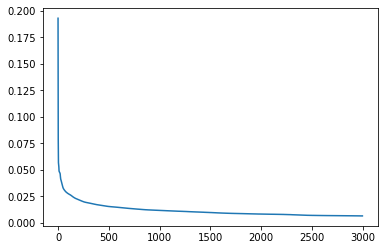

In [321]:
plt.plot(history.history['loss'])
plt.show()

In [322]:
print(results.shape)
print(y_test.shape)

(4428, 1, 46)
(4428, 1, 46)


In [6]:
plt.scatter(x_test, results, c='r')
plt.scatter(x_test, y_test, c='g')
plt.scatter(x_test, results, c='r')
plt.show()

NameError: name 'x_test' is not defined

In [14]:
start = []
for i in range(23):
    x_rand = random.uniform(0, 1)
    y_rand = random.uniform(0, 68/105)
    start.append(x_rand)
    start.append(y_rand)
    
#start = data[1]
start = np.array(start)
start = np.reshape(start, (1, 1, 46))

jogo_simulado = [start]
next_step = start
for i in range(5000):
    next_step = model.predict(next_step)
    jogo_simulado.append(next_step)

jogo_simulado = np.array(jogo_simulado)
jogo_simulado = np.reshape(jogo_simulado, (5001, 46))
print(jogo_simulado.shape)  

(5001, 46)


In [15]:
np.savetxt('jogo_simulado.txt', jogo_simulado, delimiter=',')

In [16]:
np.min(jogo_simulado)

0.009446569514674819